In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = './data/poor_feat_reward.csv'
data = pd.read_csv(file_path)
data.head(10)

,0.368911297,0.0,0.0.1,0.352732448,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.028426605,...,0.0.12,0.174854523,0.0.13,0.0.14,0.027913425,0.0.15,0.0.16,0.0.17,0.321641121,0.6643035
0,0.049188,0.000000,0.190557,0.282186,0.000000,0.000000,0.421808,0.000000,0.831834,0.061591,...,0.0,0.328338,0.052305,0.000000,0.040319,0.0,0.0,0.0,0.394904,0.560035
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.364359
2,0.000000,0.000000,0.000000,1.410930,0.000000,0.000000,0.000000,0.000000,0.000000,0.028427,...,0.0,0.314738,0.000000,0.000000,0.027913,0.0,0.0,0.0,0.289477,0.689404
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.546938
4,0.368911,0.000000,0.238196,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.486011
5,0.351344,0.000000,0.136112,0.000000,0.000000,0.000000,0.000000,0.000000,0.396111,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.431704
6,0.196753,0.000000,0.000000,0.000000,0.000000,0.000000,0.421808,0.612805,0.554556,0.073909,...,0.0,0.181849,0.094149,0.000000,0.145150,0.0,0.0,0.0,0.167253,0.541530
7,0.409901,0.000000,0.000000,0.000000,0.681641,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.418508
8,0.131168,0.516724,0.000000,0.188124,0.000000,0.000000,0.000000,0.408537,0.369704,0.061591,...,0.0,0.151541,0.078457,0.180762,0.060479,0.0,0.0,0.0,0.139378,0.648084
9,0.122970,0.000000,0.000000,0.117577,0.000000,0.999423,0.351506,0.000000,0.000000,0.190052,...,0.0,0.077935,0.080699,0.000000,0.046655,0.0,0.0,0.0,0.125440,0.633906


In [3]:
correlation=abs(data.corr().values)
correlation=np.around(correlation,decimals=3)

In [4]:
labels = ["主要道路", "内部道路", "城市主干道", "城市次干道", "城郊道路", "行人步行道", "高架快速路", "自行车道", "未建成道路",
            "交通设施", "住宿服务", "体育休闲", "公共设施", "公司企业", "医疗保健", "商业服务", "内部设施", "摩托服务", "政府机构", "汽车服务",
            "汽车维修", "汽车销售", "生活服务", "科教文化", "购物服务", "道路设施", "道路附属", "金融保险", "风景名胜", "餐饮服务", "奖励值"]
labels=['MainRoad','InnerRoad','CityBranch','UrbanSecondary','SuburbanRoad','SideWalks','FreeWay','CycleWay','UnBuiltRoad','Transportation'
,'Accommodation','Sport','Public','Enterprises','Medical','Commercial','Indoor','Motorcycle','Government','CarService','CarRepair','CarSale',
'Life','Science&Education','Shopping','PassFacilities','RoadFurniture','Finance','Attractions','Food&Beverages','Reward']

In [5]:
correlation = pd.DataFrame(data = correlation,columns = labels,index=labels)

<ipython-input-6-c711d37f7869>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data.corr(), dtype=np.bool)


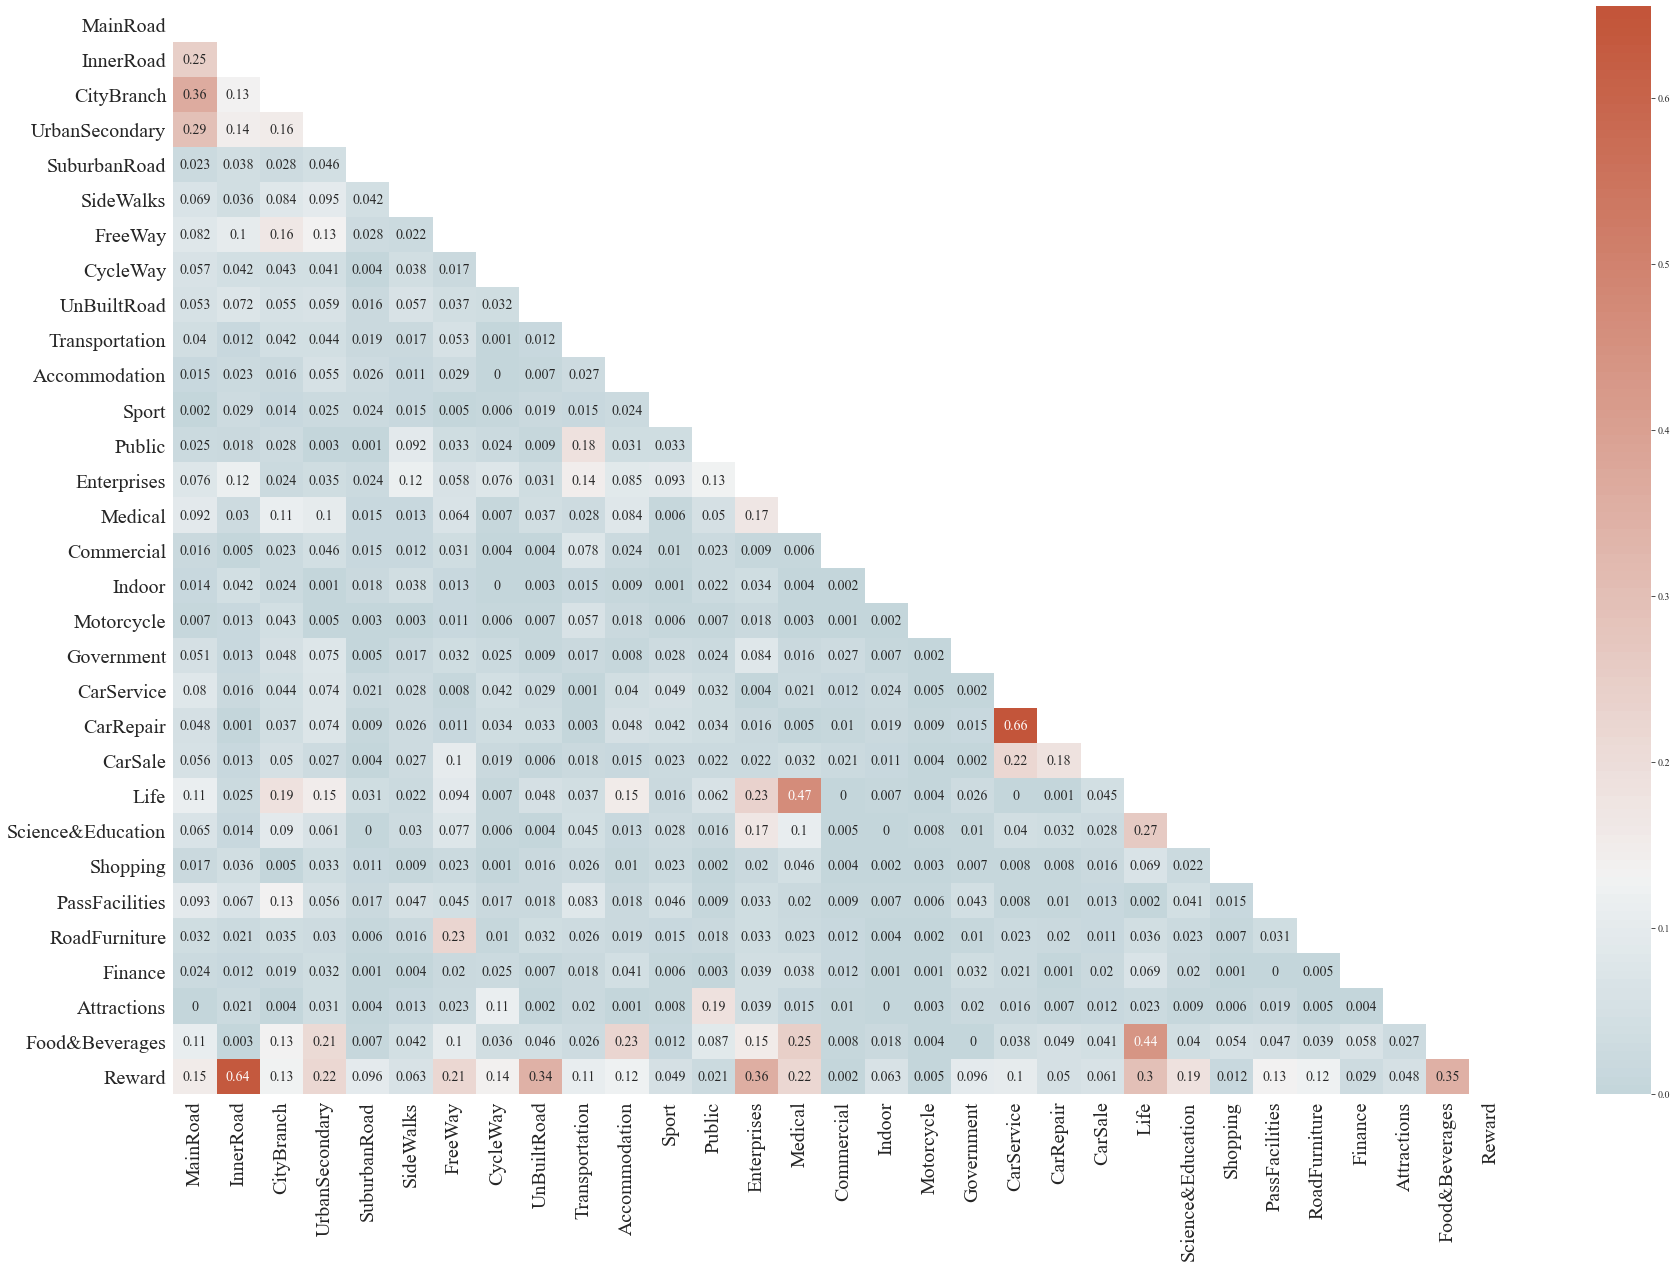

In [6]:
plt.style.use('ggplot')
rc = {'font.sans-serif': 'Times New Roman',
      'axes.unicode_minus': False}
sns.set_style(style='whitegrid',rc=rc)
plt.subplots(figsize = (30,20))
 
# 为上三角矩阵生成掩码
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlation, 
            cmap=sns.diverging_palette(220,20,n=200),
            mask = mask, # 数据显示在mask为False的单元格中
            annot=True, # 注入数据
            annot_kws={"fontsize":14},
            center = 0.13,  # 绘制有色数据时将色彩映射居中的值
           )
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('./img/sns_causal_poor.png',dpi=400)